# Project: Investigate a Dataset (Match data analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading data first
data = pd.read_csv(r"data\football dataset.csv")

In [3]:
# look at the first 5 rows
data.head(5)

,Unnamed: 0.1,index,Unnamed: 0,id,country_id,league_id,season,stage,date,match_api_id,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,0,0,0,1,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,2,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,3,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,3,4,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,4,5,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# look at some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 80 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      25979 non-null  int64  
 1   index             25979 non-null  int64  
 2   Unnamed: 0        25979 non-null  int64  
 3   id                25979 non-null  int64  
 4   country_id        25979 non-null  object 
 5   league_id         25979 non-null  object 
 6   season            25979 non-null  object 
 7   stage             25979 non-null  int64  
 8   date              25979 non-null  object 
 9   match_api_id      25979 non-null  int64  
 10  home_team_api_id  25979 non-null  object 
 11  away_team_api_id  25979 non-null  object 
 12  home_team_goal    25979 non-null  int64  
 13  away_team_goal    25979 non-null  int64  
 14  home_player_X1    24158 non-null  float64
 15  home_player_X2    24158 non-null  float64
 16  home_player_X3    24147 non-null  float6

In [5]:
# look at the statictics properties of each column
data.describe()

,Unnamed: 0.1,index,Unnamed: 0,id,stage,match_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
count,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,24158.000000,24158.000000,...,24701.000000,24686.000000,24658.000000,24644.000000,24666.000000,24744.000000,24638.000000,24651.000000,24538.000000,24425.000000
mean,12989.000000,12989.000000,12989.000000,12990.000000,18.242773,1.195429e+06,1.544594,1.160938,0.999586,2.073516,...,107614.617424,91126.781293,95083.910617,109800.936901,102308.262588,97898.056014,109265.114214,111087.003448,107149.115943,104932.876970
std,7499.635658,7499.635658,7499.635658,7499.635658,10.407354,4.946279e+05,1.297158,1.142110,0.022284,0.387185,...,113758.447918,101438.583414,103845.905029,112450.715516,110861.276758,107359.030969,116358.092456,116492.957656,112397.540326,110237.525957
min,0.000000,0.000000,0.000000,1.000000,1.000000,4.831290e+05,0.000000,0.000000,0.000000,0.000000,...,2790.000000,2752.000000,2752.000000,2790.000000,2625.000000,2625.000000,2625.000000,2625.000000,2770.000000,2802.000000
25%,6494.500000,6494.500000,6494.500000,6495.500000,9.000000,7.684365e+05,1.000000,0.000000,1.000000,2.000000,...,32579.000000,30464.000000,30627.000000,33453.500000,31037.000000,30920.000000,32863.000000,33435.000000,32627.000000,32747.000000
50%,12989.000000,12989.000000,12989.000000,12990.000000,18.000000,1.147511e+06,1.000000,1.000000,1.000000,2.000000,...,42388.000000,39892.000000,41083.000000,46212.000000,41634.500000,41433.000000,45816.000000,45860.000000,45358.000000,42652.000000
75%,19483.500000,19483.500000,19483.500000,19484.500000,27.000000,1.709852e+06,2.000000,2.000000,1.000000,2.000000,...,159882.000000,121080.000000,145561.000000,160844.000000,151079.000000,144996.000000,163611.750000,164209.000000,161291.000000,161660.000000
max,25978.000000,25978.000000,25978.000000,25979.000000,38.000000,2.216672e+06,10.000000,9.000000,2.000000,8.000000,...,748432.000000,705484.000000,728414.000000,746419.000000,722766.000000,750435.000000,717248.000000,722766.000000,722766.000000,726956.000000


In [6]:
# count number of nan in each column
data.isna().sum()

Unnamed: 0.1         0
index                0
Unnamed: 0           0
id                   0
country_id           0
                  ... 
away_player_7     1235
away_player_8     1341
away_player_9     1328
away_player_10    1441
away_player_11    1554
Length: 80, dtype: int64

In [7]:
# look at the shape of data
data.shape

(25979, 80)

so we can see we have 25979 rows and 85 columns

In [8]:
# make all goals of home and away
all_goals = data["home_team_goal"] + data["away_team_goal"]
all_goals

0        2
1        0
2        3
3        5
4        4
        ..
25974    1
25975    3
25976    2
25977    0
25978    7
Length: 25979, dtype: int64

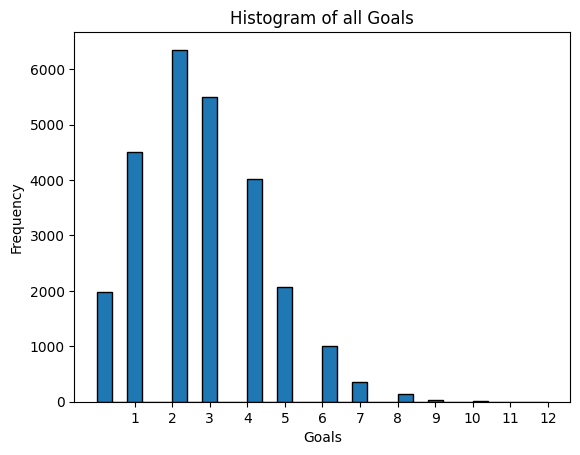

In [9]:
# create a histogram of all goals
plt.hist(all_goals, bins=30, edgecolor='black')  
plt.title('Histogram of all Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.xticks(range(1, 13))
plt.show()

we can see the most matches results goals is 2

## Data Cleaning

#### drop columns that I won't use

In [10]:
# drop columns that I won't use
cleaned = data.drop(columns= data.columns[:2].to_list() + data.columns[14:].to_list())

In [11]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        25979 non-null  int64 
 1   id                25979 non-null  int64 
 2   country_id        25979 non-null  object
 3   league_id         25979 non-null  object
 4   season            25979 non-null  object
 5   stage             25979 non-null  int64 
 6   date              25979 non-null  object
 7   match_api_id      25979 non-null  int64 
 8   home_team_api_id  25979 non-null  object
 9   away_team_api_id  25979 non-null  object
 10  home_team_goal    25979 non-null  int64 
 11  away_team_goal    25979 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.4+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What teams have scored the most goals?)

In [12]:
# total home goals for each team
home_goals = cleaned.groupby('home_team_api_id')['home_team_goal'].sum()

# total away goals for each team
away_goals = cleaned.groupby('away_team_api_id')['away_team_goal'].sum()

# total goals for each team (add the two above)
total_goals = home_goals + away_goals

# sorting total goals
total_goals.sort_values(ascending=False, inplace=True)

In [13]:
# get the first 10 teams
top_10_teams = total_goals.head(10)
top_10_teams

home_team_api_id
FC Barcelona         849
Real Madrid CF       843
Celtic               695
FC Bayern Munich     653
PSV                  652
Ajax                 647
FC Basel             619
Manchester City      606
Chelsea              583
Manchester United    582
dtype: int64

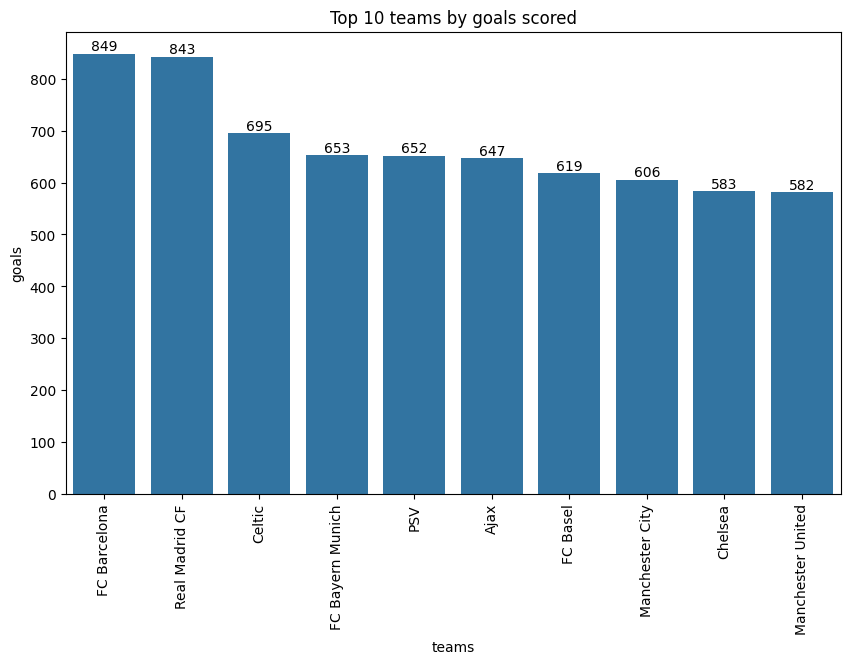

In [14]:
# plotting the top 10 teams
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_10_teams.index, y=top_10_teams.values)
plt.title('Top 10 teams by goals scored')
plt.xlabel('teams')
plt.ylabel('goals')
plt.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

### Research Question 2  (What is the best team in each league?)

In [15]:
# Calculate the total number of goals scored by each team in each league
home_goals = cleaned.groupby(['league_id', 'home_team_api_id'])['home_team_goal'].sum()
away_goals = cleaned.groupby(['league_id', 'away_team_api_id'])['away_team_goal'].sum()

# Combine home and away goals and sum them up
goals_scored = home_goals.add(away_goals, fill_value=0)

# Find the team with the highest number of goals scored in each league
best_teams = goals_scored.groupby(level=0).idxmax().apply(lambda x: x[1])

# Convert to DataFrame for plotting
best_teams_df = best_teams.reset_index(name='team_id')

# Define the order of the league IDs for plotting
league_order = best_teams_df['league_id'].unique()[::-1]


In [16]:
# best team in each leage
best_teams

league_id
Belgium Jupiler League           RSC Anderlecht
England Premier League          Manchester City
France Ligue 1              Paris Saint-Germain
Germany 1. Bundesliga          FC Bayern Munich
Italy Serie A                          Juventus
Netherlands Eredivisie                      PSV
Poland Ekstraklasa               Legia Warszawa
Portugal Liga ZON Sagres             SL Benfica
Scotland Premier League                  Celtic
Spain LIGA BBVA                    FC Barcelona
Switzerland Super League               FC Basel
dtype: object

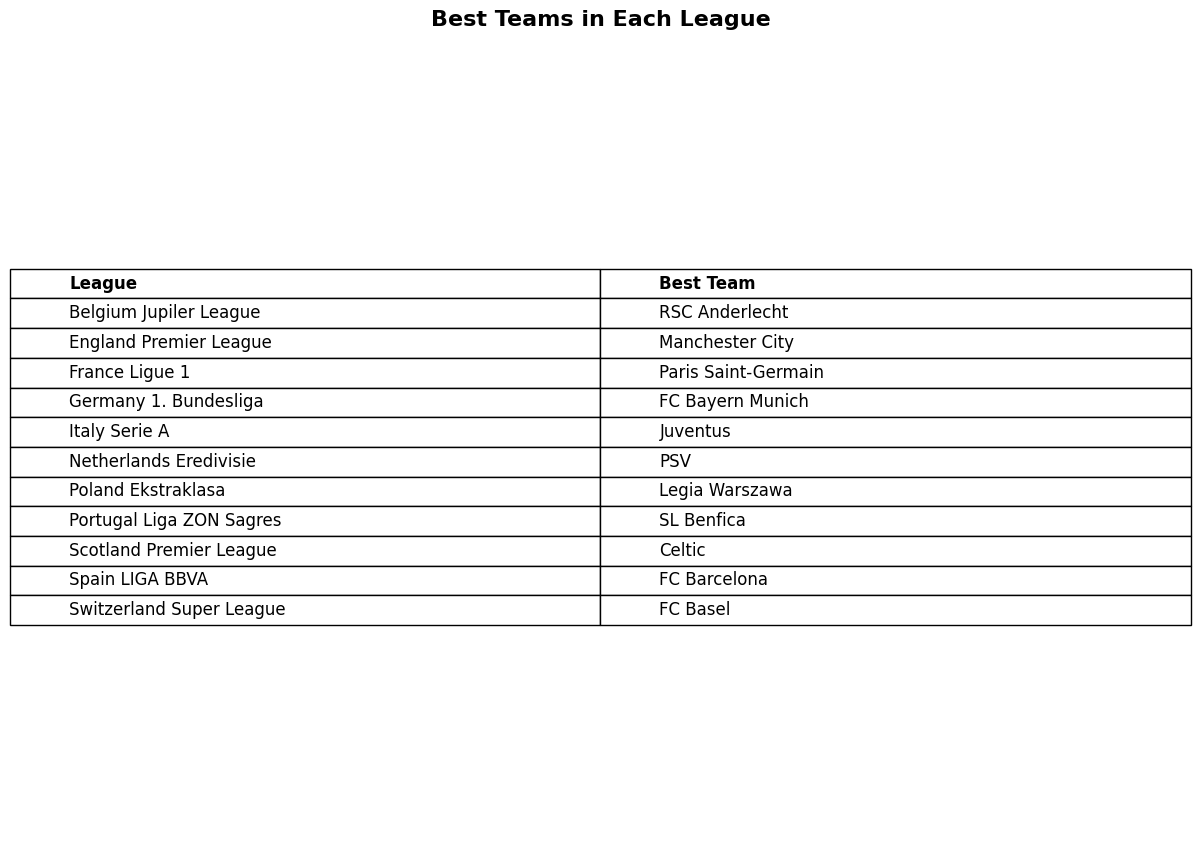

In [17]:
# convert to dataframe
best_df = best_teams.reset_index()
best_df.columns = ['League', 'Best Team']

# Create figure
fig, ax = plt.subplots(figsize=(12, len(best_df) * 0.6 + 2))
ax.axis('off')

# Draw the table
table = ax.table(cellText=best_df.values, colLabels=best_df.columns, loc='center', cellLoc='left', colLoc='left')

# Font settings
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Make header bold
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold')  # Bold header row

# Title
plt.title("Best Teams in Each League", fontsize=16, weight='bold', pad=20)

plt.tight_layout()
plt.show()

### Research Question 3  (Which teams improved the most over the time period?)

In [18]:
# Calculate total goals for each team and each season
cleaned['total_goals'] = cleaned['home_team_goal'] + cleaned['away_team_goal']
team_goals = cleaned.groupby(['season', 'home_team_api_id'])['total_goals'].sum()

# this function takes a parameter x and returns the difference between the last and first element of x
def calculate_improvement(x):
    return x.iloc[-1] - x.iloc[0]

team_improvement = team_goals.groupby('home_team_api_id').apply(calculate_improvement)


In [19]:
# we can use this way to get top 10 improved teams
top_10_improved = team_improvement.nlargest(10)

In [20]:
# or we can use this way
team_improvement.sort_values(ascending=False, inplace=True)
top_10_improved = team_improvement.head(10)
top_10_improved

home_team_api_id
KV Oostende                52
Cracovia                   33
Wigan Athletic             30
SC Braga                   30
Grenoble Foot 38           30
SL Benfica                 28
AJ Auxerre                 28
Wolverhampton Wanderers    27
Paris Saint-Germain        25
Elche CF                   25
Name: total_goals, dtype: int64

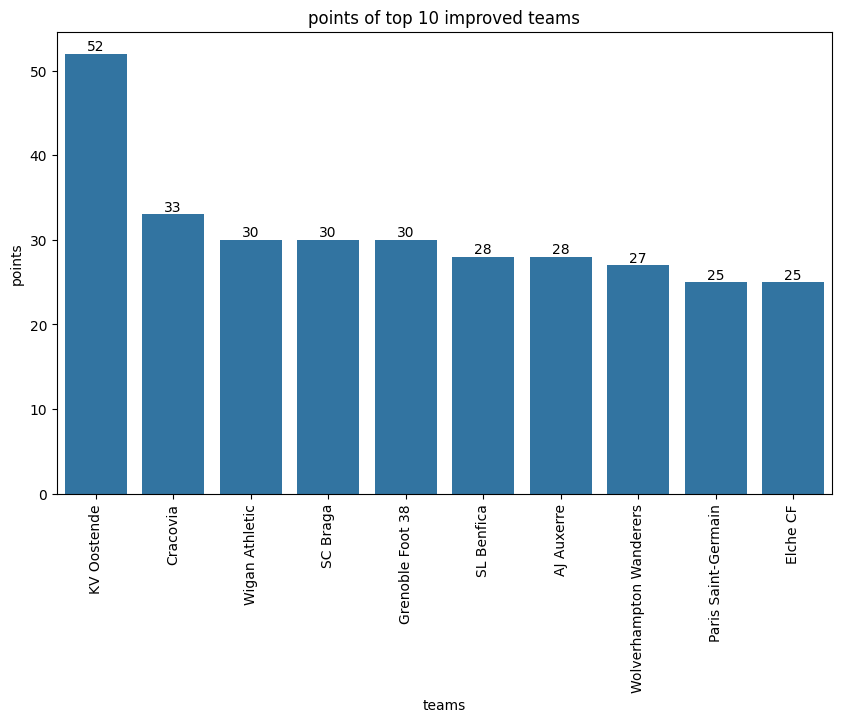

In [21]:
# plotting the top 10 improved teams
plt.figure(figsize=(10,6))
ax2 = sns.barplot(x=top_10_improved.index, y=top_10_improved.values)
plt.title('points of top 10 improved teams')
plt.xlabel('teams')
plt.ylabel('points')
plt.bar_label(ax2.containers[0])
plt.xticks(rotation=90)
plt.show()

### so we can see is the team that scored the most goals is :<b>FC Barcelona </b>

### the most improved team is : <b>KV Oostende </b>

<a id='conclusions'></a>
## Conclusions

### we can play more offensively like <b>FC Barcelona</b> to score more goals

#### We can research the teams that scored the most goals
    why they scored so many goals?
    Is this because they have good strikers?
    Or are they playing offensively?

#### We can also research about the best teams in each league
    Why are they the best?
    Is this because the other teams in the league are weak or is the team actually doing well?

#### We can also do a search for teams that have improved over time and teams have not improved
    Which team plan made them improve?
    Which team plan made them not improve?
    What is the coach's successful method that made them improve to this extent?